In [ ]:
# ARIMA_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


ARIMA trên Validation
MAE : 3187987708.74
RMSE: 4646548058.39
R²  : -0.0232

ARIMA trên Test
MAE : 7182443047.50
RMSE: 7472384936.27
R²  : -2.0730


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

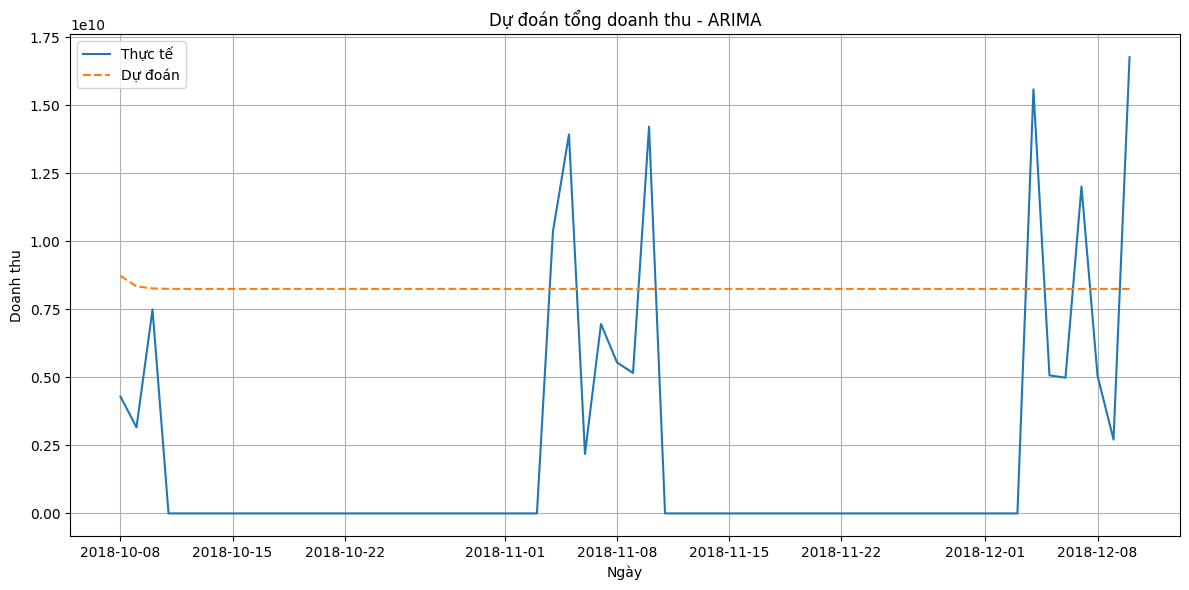

In [ ]:
# Hàm đánh giá
def evaluate(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")

# Đọc dữ liệu
train = pd.read_csv("train.csv", parse_dates=["date"])
val = pd.read_csv("validation.csv", parse_dates=["date"])
test = pd.read_csv("test.csv", parse_dates=["date"])

# Chuyển đổi thành chuỗi thời gian
train_series = train.set_index("date")["total_sales"].resample("D").sum().fillna(0)
val_series = val.set_index("date")["total_sales"].resample("D").sum().fillna(0)
test_series = test.set_index("date")["total_sales"].resample("D").sum().fillna(0)

# Huấn luyện ARIMA
model = ARIMA(train_series, order=(1, 1, 1))
model_fit = model.fit()

# Dự đoán validation
val_pred = model_fit.forecast(steps=len(val_series))
evaluate(val_series, val_pred, "ARIMA trên Validation")

# Dự đoán test
full_series = pd.concat([train_series, val_series])
model_final = ARIMA(full_series, order=(1, 1, 1)).fit()
test_pred = model_final.forecast(steps=len(test_series))
evaluate(test_series, test_pred, "ARIMA trên Test")

# Trực quan
plt.figure(figsize=(12,6))
plt.plot(test_series.index, test_series.values, label="Thực tế")
plt.plot(test_series.index, test_pred, label="Dự đoán", linestyle="--")
plt.title("Dự đoán tổng doanh thu - ARIMA")
plt.xlabel("Ngày")
plt.ylabel("Doanh thu")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pyclustering

In [ ]:
!pip install numpy==1.23.5 --force-reinstall

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from pyclustering.cluster.xmeans import xmeans, kmeans_plusplus_initializer


🔍 Đánh giá trên tập Train + Validation:
MAE : 3142730.56
RMSE: 10167066.08
R2  : 0.8857

🔍 Đánh giá trên tập Test:
MAE : 11697661.54
RMSE: 35618141.26
R2  : -0.0677


<ipython-input-30-755b0da405d6>:66: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


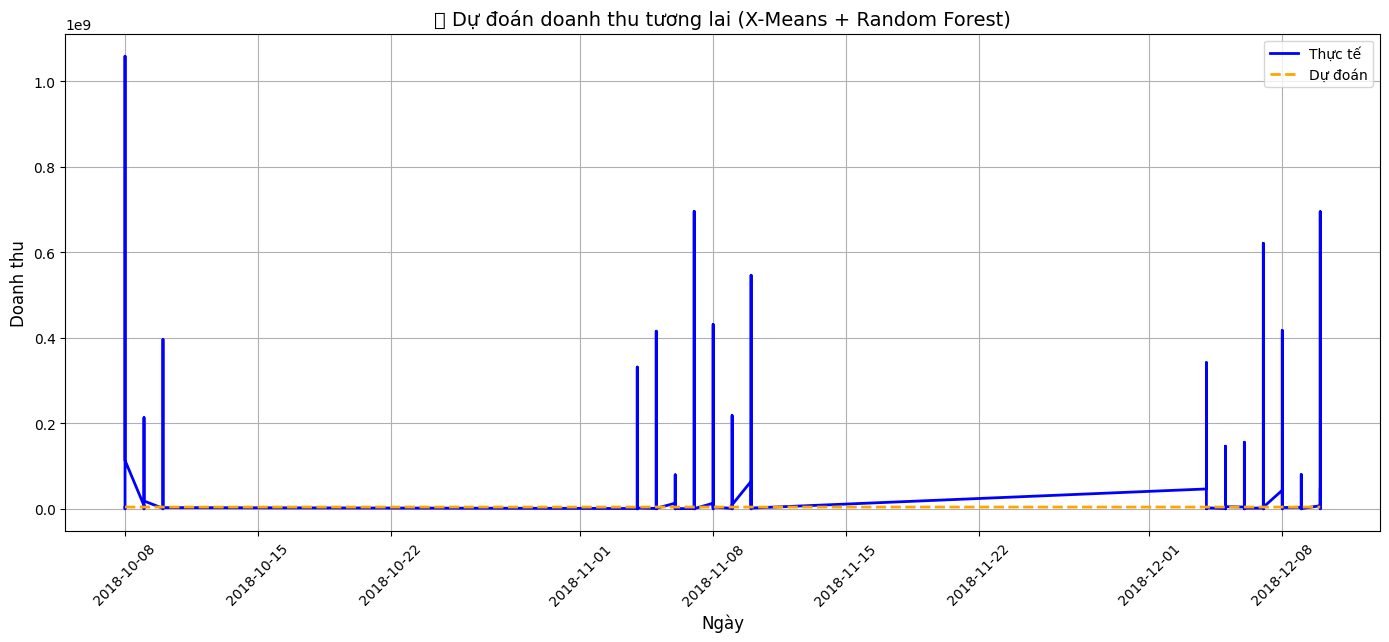

In [ ]:

# ====== BƯỚC 1: ĐỌC DỮ LIỆU ======
train = pd.read_csv("train.csv", parse_dates=["date"])
val = pd.read_csv("validation.csv", parse_dates=["date"])
test = pd.read_csv("test.csv", parse_dates=["date"])

# Gộp dữ liệu theo thứ tự thời gian
df_all = pd.concat([train, val, test]).sort_values("date").reset_index(drop=True)

# ====== BƯỚC 2: X-MEANS CLUSTERING TRÊN THỜI GIAN ======
df_all["day_idx"] = np.arange(len(df_all))  # ngày liên tục từ 0 -> N
X_time = df_all["day_idx"].values.reshape(-1, 1)

# Khởi tạo tâm ban đầu cho X-Means
initial_centers = kmeans_plusplus_initializer(X_time, 2).initialize()
xmeans_instance = xmeans(X_time.tolist(), initial_centers)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

# Gán nhãn cluster vào mỗi dòng dữ liệu
labels = np.zeros(len(X_time))
for i, cluster in enumerate(clusters):
    labels[cluster] = i
df_all["cluster_label"] = labels

# ====== BƯỚC 3: TẠO TẬP HUẤN LUYỆN & TẬP KIỂM TRA ======
X_full = np.hstack([X_time, labels.reshape(-1, 1)])
y_full = df_all["total_sales"].values

# Tách theo tỉ lệ 70% train, 10% val, 20% test
n = len(df_all)
train_end = int(n * 0.7)
val_end = int(n * 0.8)

X_train = X_full[:val_end]  # train + val
y_train = y_full[:val_end]
X_test = X_full[val_end:]
y_test = y_full[val_end:]

# ====== BƯỚC 4: HUẤN LUYỆN ENSEMBLE LEARNING (Random Forest) ======
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ====== BƯỚC 5: HÀM ĐÁNH GIÁ ======
def evaluate_and_plot(X, y_true, dataset_name):
    y_pred = model.predict(X)
    print(f"\n🔍 Đánh giá trên tập {dataset_name}:")
    print("MAE :", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(mean_squared_error(y_true, y_pred) ** 0.5, 2))
    print("R2  :", round(r2_score(y_true, y_pred), 4))

evaluate_and_plot(X_train, y_train, "Train + Validation")
evaluate_and_plot(X_test, y_test, "Test")

# ====== BƯỚC 6: VẼ BIỂU ĐỒ DỰ ĐOÁN DOANH THU ======
dates_all = df_all["date"]
y_test_pred = model.predict(X_test)

plt.figure(figsize=(14, 6))
plt.plot(dates_all[val_end:], y_test, label="Thực tế", color='blue', linewidth=2)
plt.plot(dates_all[val_end:], y_test_pred, label="Dự đoán", color='orange', linestyle="--", linewidth=2)
plt.title("Dự đoán doanh thu tương lai (X-Means clustering + Ensemble Learning)", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Doanh thu", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()